<img align="left" style="width: 170px;" src="udea_escudo.png">

# Laboratorio 6 PDS 2020-1
### Yorguin José Mantilla Ramos
CC.1127617499
 
Grupo:3


### 2. Generación de Señales

Generar un tren de pulsos de periodo N y amplitud 1 donde se visualicen por lo menos 5 periodos de la señal.
(N=50 +  ́ultimo número de cédula). Grafique el resultado.

(59,)
(295,)


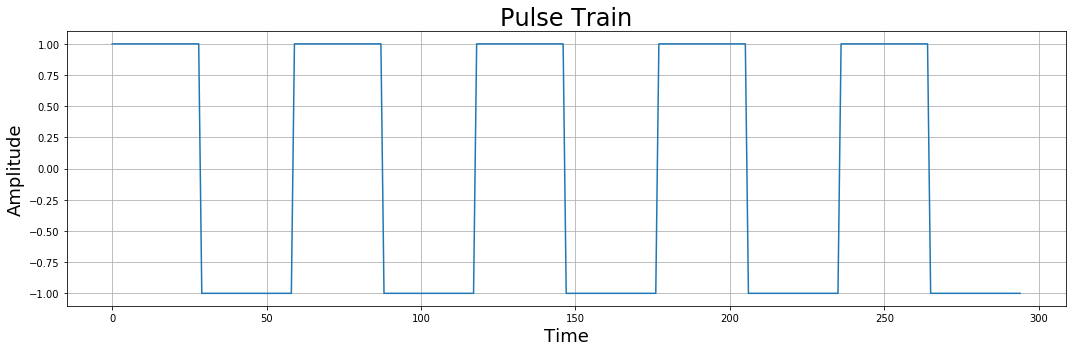

In [1]:
import numpy as np
import my_utils as mu

N = 50 + 9
N_per = 5

signal = np.hstack((np.ones(int(np.floor(N/2))),-1 * np.ones(int(np.ceil(N/2)))))
print(signal.shape)
signal = np.tile(signal, N_per) # N per es el numero de periodos de la senal
print(signal.shape)

mu.plot_signal(signal,xlabel='Time',ylabel='Amplitude',title='Pulse Train',show=True)


### 3. Coeficientes de la serie de Fourier

#### 3.1. Cree una función que calcule los coeficientes de la serie de Fourier para una señal x[n] cualquiera.


In [2]:
import copy

def fourier_coefs(x_n,Ncoef):
    # x_n: senal definida en un periodo
    # Ncoef: numero de componentes a hallar
    Ncoef = int(np.ceil(Ncoef/2))
    cn=np.empty(2 * Ncoef-1,'complex')
    n=np.arange(0,len(x_n),1)
    #print(n)
    ks = list(np.arange(Ncoef))
    ks_ = list(np.arange(1,Ncoef))
    ks_.reverse()
    ks_ = np.array(ks_)*-1
    ks = np.array(ks)
    ks = np.hstack([ks_,ks])
    #print(ks)
    for i,k in enumerate(ks.tolist()):
        cn[i]= np.sum(x_n*np.exp(-1j*2*k*np.pi*n/N)) * 1/N
    return cn,ks
sig_1per = signal[:N]
cn,ks = fourier_coefs(sig_1per,N)
print('k=',ks)


k= [-29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12
 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29]


#### 3.2. Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval.
¿Obtuvo el resultado esperado?. Explique.


In [3]:
print('Potencia Parseval:',np.sum(np.abs(cn)**2))
print('Potencia Tiempo:',(np.sum(np.abs(sig_1per)**2)/sig_1per.shape[0]))

Potencia Parseval: 1.0000000000000007
Potencia Tiempo: 1.0


Si, el resultado es el aproximado a la potencia esperada $A^2 =1$, esto era de esperarse debido al teorema de Parseval

#### 3. A partir de los coeficientes obtenidos, grafique el espectro de potencia de la señal. ¿Que puede concluir?


Y:\code\pds_lab\Lab6_PDS_Mantilla_Yorguin\my_utils.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  foo(x,y)


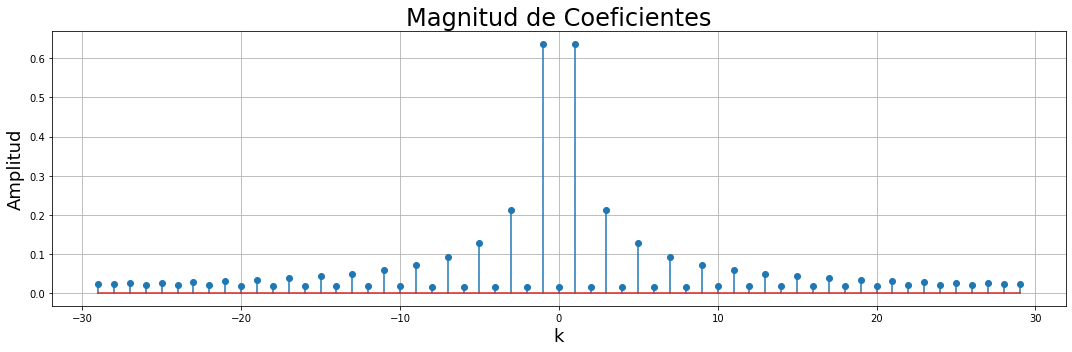

In [4]:
mu.plot_signal(ks,np.abs(cn),stem=True,xlabel='k',ylabel='Amplitud',title='Magnitud de Coeficientes')

- El espectro representa la distribución de energía de una señal a lo largo de sus armónicos
- El espectro es símetrico debido a que la señal es real pura
- El espectro decae a medida que aumenta $k$, es decir la mayor potencia se encuentra en los armónicos bajos de la señal
- En general los coeficientes correspondietes a valores pares de $k$ parecen ser nulos
- $k$ representa un índice frecuencial que refleja el número del armónico de la señal
- $k$ es simétrico por lo que el par $[-1,1]$ y en general $[-i,i]$ se refieren a una misma componente
- Aunque aquí no se observa, el espectro es periódico y esto se corrobora al sacar el espectro para valores de k mayores a $N//2$

### 4. Sintesis de señales

#### 4.1. Escriba una función que permita sintetizar la señal x(t) a partir de los coeficientes obtenidos.


In [5]:
def synthezise_fourier(ck,ks,NumP=1,Ncoef=None):
    #ck: Coeficientes de la serie
    #N: Periodo de la senal
    #Nump: Numero de periodos a graficar
    if Ncoef is None:
        Ncoef = len(ck)//2
    N = len(ck)
    n = np.arange(0,N * NumP,1)
    senalF = np.zeros(N * NumP,'complex')
    zero_idx = np.where(np.isclose(ks,0))[0][0]
    #print(Ncoef)
    #print(len(ks))
    for i in range(Ncoef):
        component = ck[zero_idx+i]*np.exp(1j*2*ks[zero_idx+i]*np.pi*n/N)
        component += ck[zero_idx-i]*np.exp(1j*2*ks[zero_idx-i]*np.pi*n/N)
        if i == 0:
            component /= 2
        senalF += component

    return np.real(senalF)



#### 4.2. ¿Por que se divide por 2 cuando k=0?

- En general las componentes estan partidas a los dos lados del espectro, contribuyendo cada una de esas partes la mitad. 
- Sin embargo, cuando se esta en la componente 0, esta no esta reflejada a los dos lados por lo que no sería necesario sumar las dos partes. 
- Como en el código a todas las componentes se le suman las dos partes se hace necesario dividir la componente 0 por la mitad para que no doblemos accidentalmente su contribución.

#### 4.3. Grafique la señal usando 3, 7, 12 y (N/2)-1 coeficientes. ¿Que puede observar?. Escriba sus conclusiones.

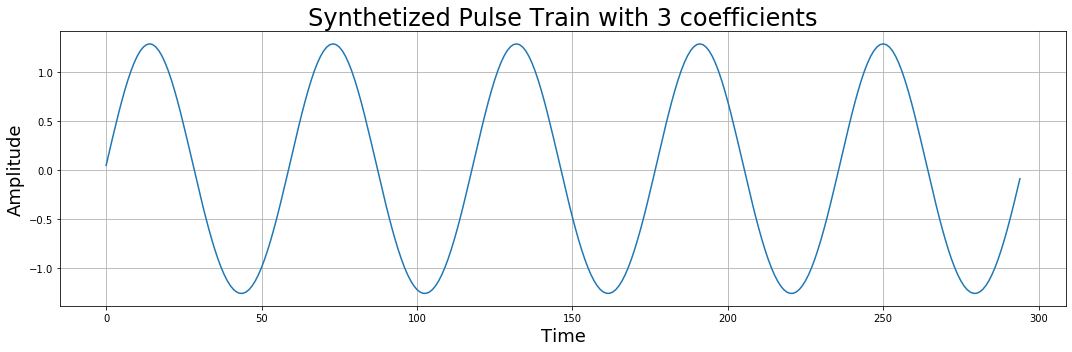

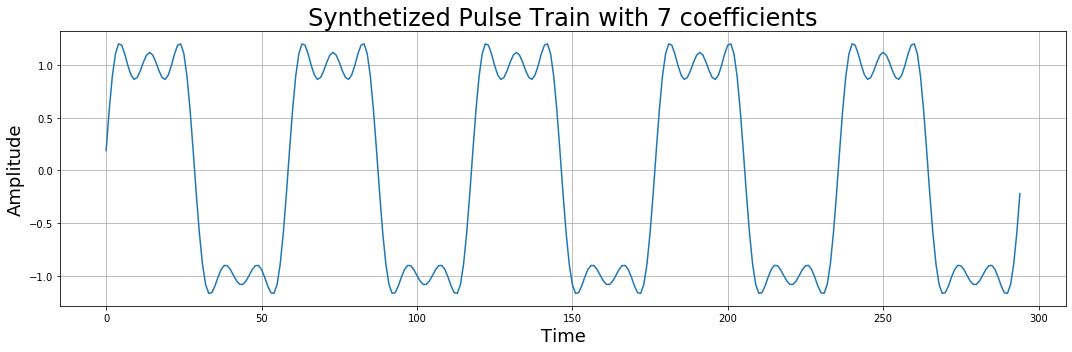

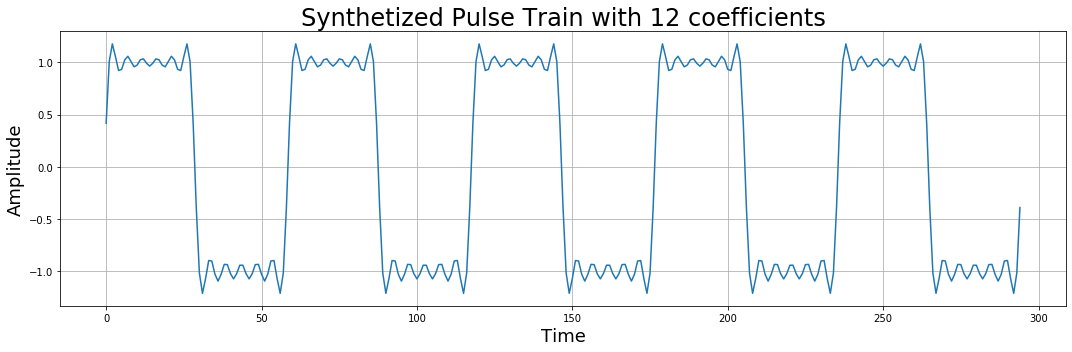

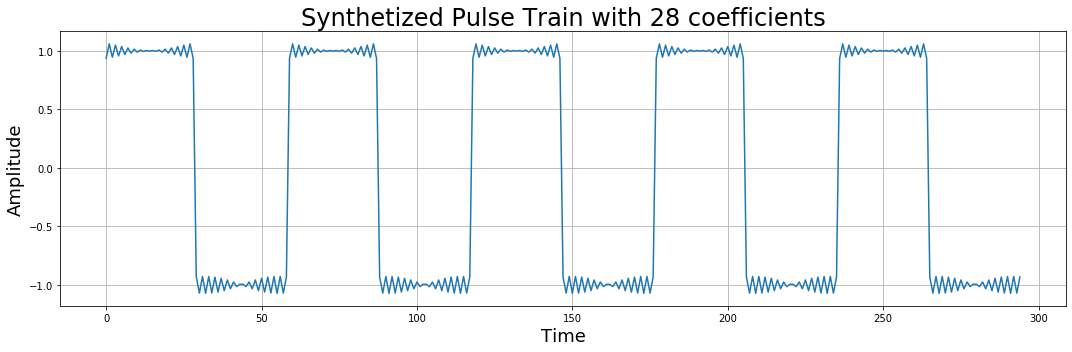

In [6]:
for Ncoef in [3, 7, 12 , (N//2)-1]:
    synth = synthezise_fourier(cn,ks,N_per,Ncoef)
    mu.plot_signal(synth,xlabel='Time',ylabel='Amplitude',title='Synthetized Pulse Train with {} coefficients'.format(Ncoef),show=True)


- Como vemos a medida que agregamos más componentes la representación de la señal mejora
- Aunque usemos todas las componentes no podemos refabricar la señal perfectamente pero si con una buena aproximación.
- En general la serie de Fourier tiene problemas con las discontinuidades ya que se necesitan un infinito número de componentes para representarlas perfectamente.
- Como en la realidad no usamos un infinito número de componentes, las discontinuidades tienen errores de representación que se muestran bajo el fenómeno de Gibbs, el cual es la ondulación de la señal cerca de las discontinuidades.




### 5. Transformada de Fourier

#### 5.1. Escriba una función que permita calcular la transformada de Fourier de una señal de tiempo discreto x[n]

In [7]:
def fourierTransform(x_n,num=50):
    ws = np.linspace(-np.pi,np.pi,num)# definir vector w (variable de tiempo continuo)
    n = np.arange(len(x_n))
    senalF=np.zeros(len(ws),'complex')
    for i,w in enumerate(ws):
        senalF[i] = np.sum(x_n*np.exp(-1j*w*n))
    return ws,senalF

#### 5.2. Calcule y grafique la transformada de Fourier de la señal cuadrada que utilizó para generar el tren de pulsos.

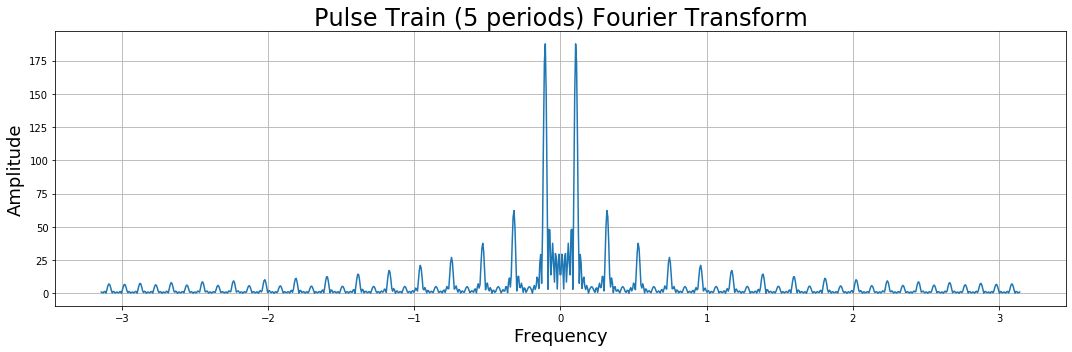

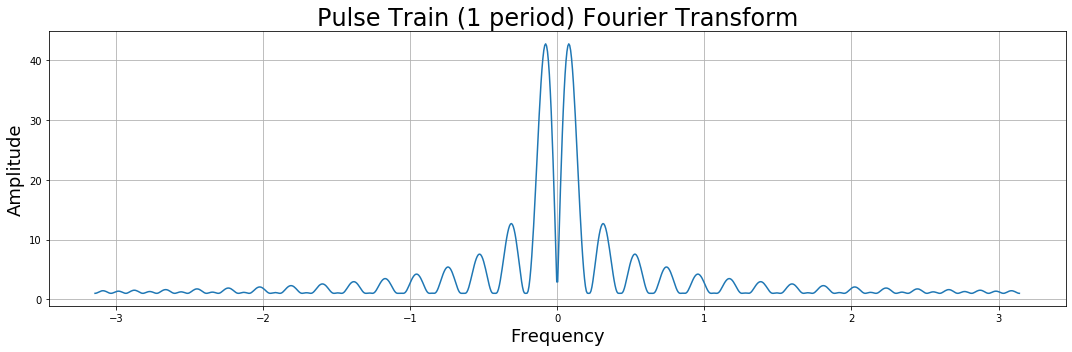

In [8]:
ws,senalF = fourierTransform(signal,1000)
ws2,senalF2 = fourierTransform(sig_1per,1000)

mu.plot_signal(ws,np.abs(senalF),xlabel='Frequency',ylabel='Amplitude',title='Pulse Train ({} periods) Fourier Transform'.format(N_per),show=True)
mu.plot_signal(ws2,np.abs(senalF2),xlabel='Frequency',ylabel='Amplitude',title='Pulse Train (1 period) Fourier Transform',show=True)


- Notemos de nuevo que el espectro es simétrico debido a que la señal es real pura
- La transformada se hace más exacta al usar más periodos de la señal
- El tamaño de paso que usemos para fabricar el vector frecuencial debe ser pequeño para poder obtener una buena representación, esto ya que en teoría $w$ varía de forma infinitesimal. En este caso hemos usado 1000 puntos entre $[-\pi,\pi]$

#### 5.3. En una misma figura compare el espectro de la transformada de Fourier con el espectro de la serie de Fourier.

¿Encuentra alguna similitud? ¿a que cree que se debe esto? Explique

Y:\code\pds_lab\Lab6_PDS_Mantilla_Yorguin\my_utils.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  foo(x,y)


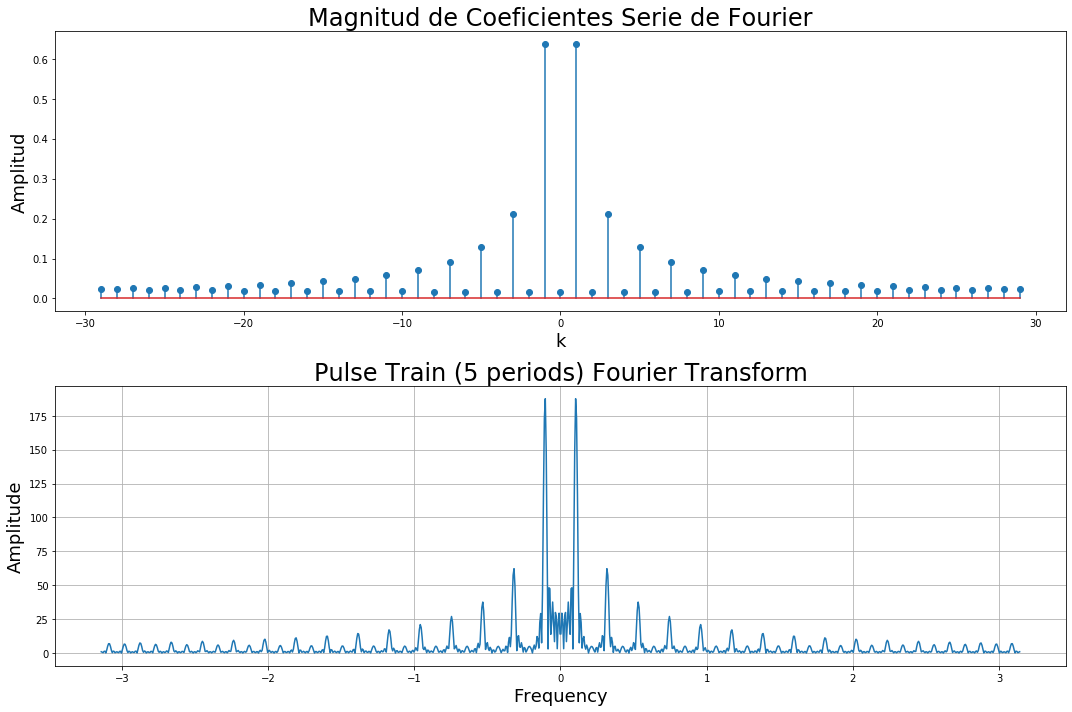

In [9]:
import matplotlib.pyplot as plt
fig,axs = mu.plot_signal(ks,np.abs(cn),stem=True,xlabel='k',ylabel='Amplitud',title='Magnitud de Coeficientes Serie de Fourier',subplots=(2,1),size=(15,10),show=False,ret=True)
axs[1].plot(ws,np.abs(senalF))
axs[1].set_title('Pulse Train ({} periods) Fourier Transform'.format(N_per),fontsize=24)
axs[1].set_xlabel('Frequency',fontsize=18)
axs[1].set_ylabel('Amplitude',fontsize=18)
plt.tight_layout()
plt.show()

- Los espectros mediante la serie y la transformada son similares ya que corresponden a una misma señal teórica que es la función de pulso períodico pero vista desde puntos de vista diferentes.
- En la serie se sabe que la señal es períodica por lo que se pueden encontrar componentes frecuenciales correspondientes a los armónicos indexados mediante k
- En la transformada no se asume que la señal sea periódica por lo que $w$ se recorre de forma infinitesimal
- En cierta forma podríamos decir que la transformada trata de aproximar el comportamiento del espectro obtenido por la serie, ya que la transformada es un caso más general.

### 6. Conclusiones

Realice conclusiones generales sobre la práctica. Recuerde que las conclusiones son parte fundamental de su evalua-
ción en el laboratorio, tómese el tiempo de pensar las conclusiones.

* En general las herramientas de transformación de tiempo a frecuencia nos permiten observar la distribución de energía de la señal en el dominio frecuencial
* El dominio frecuencial es un conjunto de sinuosides puras que tratan de representar las diversas componentes de la señal y que al sumarlas reconstruyen una aproximación de la señal
* La transformada discreta es un caso más general al incluir señales aperiodicas pero al utilizarse sobre señales periodicas esta trata de aproximar lo que se vería en la serie de Fourier de la señal periodica
* Debido a que la señal es real pura sus coeficientes son simétricos
* Al utilizar análisis de Fourier aquellas señales con discontinuidades van a presentar el fenómeno de Gibss debido a que las discontinuidades necesitan infinitas componentes para representarse
* A medida que aumentemos los componentes de la señal usados para representarla más fiel será la representación.
* En general muchas señales tienen un espectro decayente lo que quiere decir que podemos usar unas pocas componentes para representarlas y ahorrar ancho de banda.
* Mediante el teorema de Parseval podemos calcular la potencia de una señal tanto por el dominio frecuencial como el temporal
* Mientras más periodos usemos de una señal periodica en la transformada de Fourier mejor será la aproximación a la serie teórica de la señal periodica.